In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.makedirs('/content/images')
%cd /content/images
!unzip /content/drive/MyDrive/deep_daiv_medicalAI/final_image_preprocessing.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: d9fe5dc8-4161c4b0-96729d3f-2c35f3a5-b1dbc6ff.jpg  
  inflating: da018360-35691952-608f497b-bb4dcdfe-19bfd69c.jpg  
  inflating: da0200fa-6fb7c4e1-ac51e58e-7726116f-77a3c906.jpg  
  inflating: da08b844-7205a2fe-80e14292-32823d88-3d639894.jpg  
  inflating: da0bc9c0-7b7caf56-275408e8-496fdd76-5eea503f.jpg  
  inflating: da108fc6-8f9b3716-f2dce5cf-da75142a-bed0358c.jpg  
  inflating: da10949b-4398d935-b49c528b-7b676b10-0c29ad1a.jpg  
  inflating: da13fdbb-8ce40a3e-25007d83-2a495c30-7bbb9ad7.jpg  
  inflating: da18129c-77b2ca01-879806fd-a4fbdf81-371061d9.jpg  
  inflating: da189855-d3000b73-130128de-f1027fed-90af4693.jpg  
  inflating: da1ecd7a-48923501-43aee9c0-5fb6e111-c7c45f00.jpg  
  inflating: da207793-f8ab38f0-55d18e78-7ad240e1-e38c239b.jpg  
  inflating: da227d77-57a4bca0-d40539ff-a2e97331-65d9cbe5.jpg  
  inflating: da24d9ce-96877fb1-f5d536bc-59247411-60716d36.jpg  
  inflating: da2e7c69-96724dd3-0e468310-0d9e6df3-a24d91ec.jpg  
  in

In [7]:
%cd /content/drive/MyDrive/CXR_Report_Generation

/content/drive/MyDrive/AutomaticCXR-Report-Generation


In [8]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 19.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 50.5 MB/s eta 0:00:00
  Created wheel for fairscale: filename=fairscale-0.4.4-py3-none-any.whl size=292832 sha256=17aaeaec138edfcd1121efc939ccee84fe68d9cb84e7e347f20599ff062efe51
  Stored in directory: /root/.cache/pip/wheels/08/58/6f/56c57fa8315eb0bcf0287b580c850845be5f116359b809e9f1
Successfully built fairscale


In [14]:
import json
import torch
import tqdm
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from models.blip import blip_decoder

device = "cuda"
# device = 'cpu'

# 모델 로드
impression_model = blip_decoder('./output/Pretrain/findings_checkpoint_80.pth', image_size=224, vit='base')
findings_model = blip_decoder('./output/Pretrain/impression_checkpoint_80.pth', image_size=224, vit='base')

impression_model.to(device)
findings_model.to(device)
impression_model.eval()
findings_model.eval()

def load_image(image, device='cuda', image_size = 224):
    raw_image = Image.open(str(image)).convert('RGB')

    w, h = raw_image.size

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
    ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image

def show_image(image_path, device='cuda', image_size=224):
    image_tensor = load_image(image_path, device, image_size)
    image_tensor = torch.squeeze(image_tensor)
    image_tensor = image_tensor.cpu().numpy().transpose(1, 2, 0)
    image_tensor = image_tensor * torch.tensor((0.26862954, 0.26130258, 0.27577711)).numpy() + torch.tensor((0.48145466, 0.4578275, 0.40821073)).numpy()
    image_tensor = np.clip(image_tensor, 0, 1)

    plt.imshow(image_tensor)
    plt.axis('off')
    plt.show()

load checkpoint from /content/drive/MyDrive/AutomaticCXR-Report-Generation/output/findings_checkpoint_80.pth
load checkpoint from /content/drive/MyDrive/AutomaticCXR-Report-Generation/output/impression_checkpoint_80.pth


100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


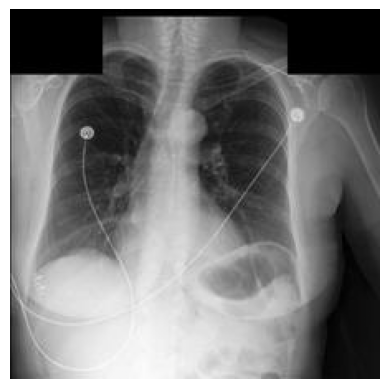

Image: /content/images/7c8d9616-b40b859c-c6358f14-2eaf2376-bbafa44b.jpg
Predicted Impression: ['cardiomegaly without superimposed acute cardiopulmonary process']
Predicted Findings: ['the right lung on the left base, with associated edema']
Actual Impression: No acute cardiopulmonary abnormality.
Actual Findings: No pleural effusion or pneumothorax is seen.
--------------------------------------------------


In [ ]:
# JSON 파일 경로
data_dir = './data/demo5'

# JSON 파일 로드
with open(data_dir, 'r') as json_file:
    data = json.load(json_file)

# 각 이미지에 대한 처리
for it in tqdm(data):
    image = it['image']
    actual_findings = it['findings']
    actual_impression = it['impression']

    im = load_image(image, device=device)
    pred_findings = impression_model.generate(im, sample=True, top_p=0.9, max_length=256, min_length=5)
    pred_impression = findings_model.generate(im, sample=True, top_p=0.9, max_length=256, min_length=5)

# 이미지 로드 및 표시
im = show_image(image)

# 결과 출력
print(f"Image: {image}")
print(f"Predicted Impression: {pred_impression}")
print(f"Predicted Findings: {pred_findings}")
print(f"Actual Impression: {actual_impression}")
print(f"Actual Findings: {actual_findings}")
print("--------------------------------------------------")